In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# show float in two decimal form
plt.style.use('ggplot')
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [2]:
vic = pd.read_csv("../../data/vic_train.csv")
vic = vic.reset_index(drop=True)

vic['time'] = vic.time.astype('datetime64[ns]')
vic['month'] = vic.time.dt.strftime('%b')
vic['day'] = vic.time.dt.strftime('%d')
vic['weekday'] = vic.time.dt.strftime("%a")
vic['year'] = vic.time.dt.strftime("%Y")

spring = ['Sep', 'Oct', 'Nov']
summer = ['Dec', 'Jan', 'Feb']
autumn = ['Mar', 'Apr', 'May']
winter = ['Jun', 'Jul', 'Aug']
vic['season'] = np.where(vic.month.isin(spring), 'Spring', np.where(
                        vic.month.isin(summer), 'Summer', np.where(
                        vic.month.isin(autumn), 'Autumn', 'Winter')))

# Log tranformation on spot price using log(x - min + 1) to avoid division by zero
min_value = min(vic.spot_price)
vic['spot_price_log'] = np.log(vic.spot_price - min_value + 1)

vic.index = vic.time
vic = vic.asfreq(freq='30T')
vic = vic.drop(columns=['time'])
vic.head()

,spot_price,inter_gen,demand,period,month,day,weekday,year,season,spot_price_log
time,,,,,,,,,,
2018-01-01 00:00:00,90.43,146.87,4599,1,Jan,01,Mon,2018,Summer,6.64
2018-01-01 00:30:00,92.46,131.68,4398,2,Jan,01,Mon,2018,Summer,6.65
2018-01-01 01:00:00,87.62,119.98,4238,3,Jan,01,Mon,2018,Summer,6.64
2018-01-01 01:30:00,73.08,123.86,4112,4,Jan,01,Mon,2018,Summer,6.62
2018-01-01 02:00:00,70.18,132.72,3956,5,Jan,01,Mon,2018,Summer,6.62


In [7]:
vic.spot_price.describe()

count   52608.00
mean       83.87
std       311.13
min      -676.37
25%        44.86
50%        68.97
75%        97.78
max     14700.00
Name: spot_price, dtype: float64

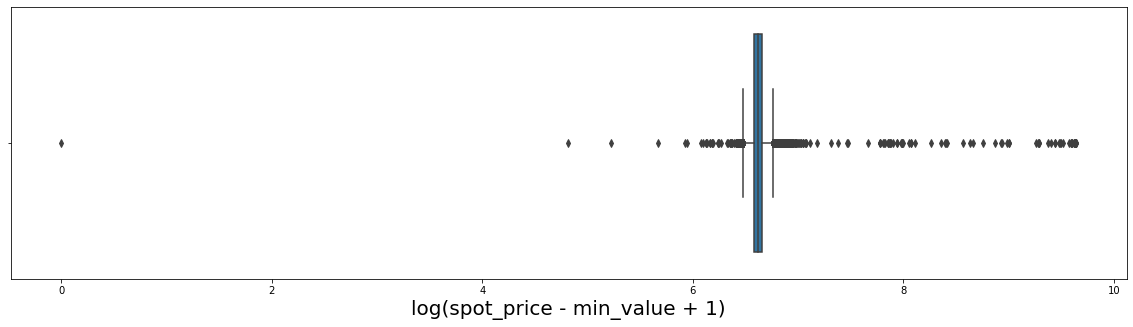

In [6]:
plt.figure(figsize=(20,5))
sns.boxplot(x=vic.spot_price_log)
plt.xlabel('log(spot_price - min_value + 1)', fontsize=20)
plt.show()

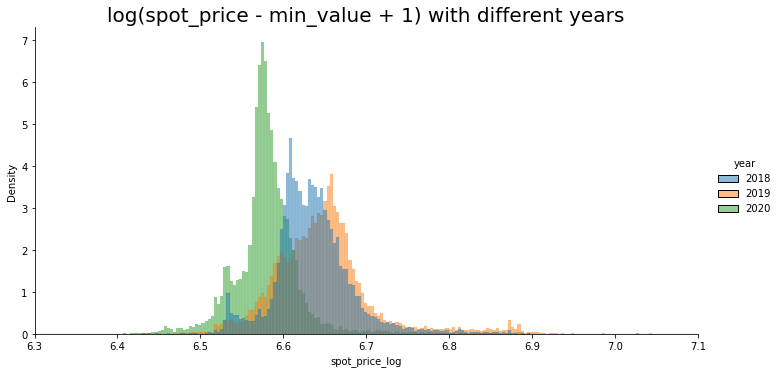

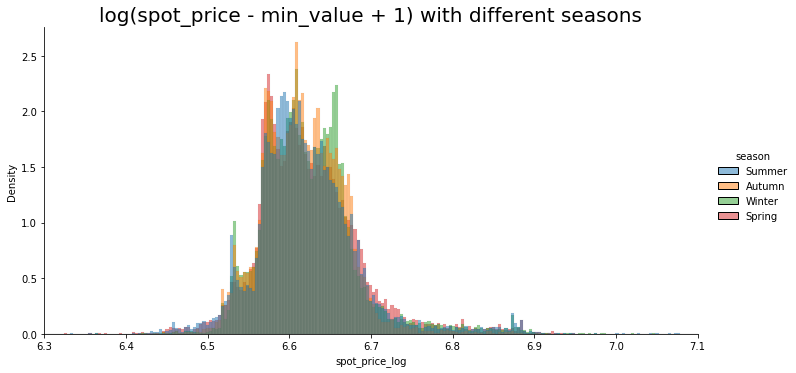

In [7]:

# year
sns.displot(vic[['spot_price_log', 'year']], x="spot_price_log", stat="density",  hue="year", height=5, aspect=2)
plt.title('log(spot_price - min_value + 1) with different years', fontsize=20)
plt.xlim(6.3,7.1)
plt.show()

# season
sns.displot(vic[['spot_price_log', 'season']], x="spot_price_log", stat="density",  hue="season", height=5, aspect=2)
plt.title('log(spot_price - min_value + 1) with different seasons', fontsize=20)
plt.xlim(6.3,7.1)
plt.show()

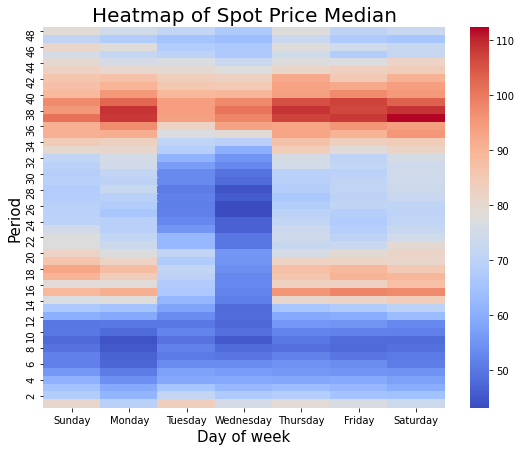

In [180]:
# Plot heatmap of spot price average
df_pivot = pd.pivot_table(vic[['spot_price', 'period', 'weekday']], index=['period'], columns=['weekday'], aggfunc=np.median)
df_pivot = df_pivot.sort_values(by='period', ascending=False)

plt.figure(figsize=(9,7))
xticklabels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.heatmap(df_pivot, xticklabels=xticklabels, cmap='coolwarm')
plt.title('Heatmap of Spot Price Median', fontsize=20)
plt.ylabel('Period', fontsize=15)
plt.xlabel('Day of week', fontsize=15)
plt.show()

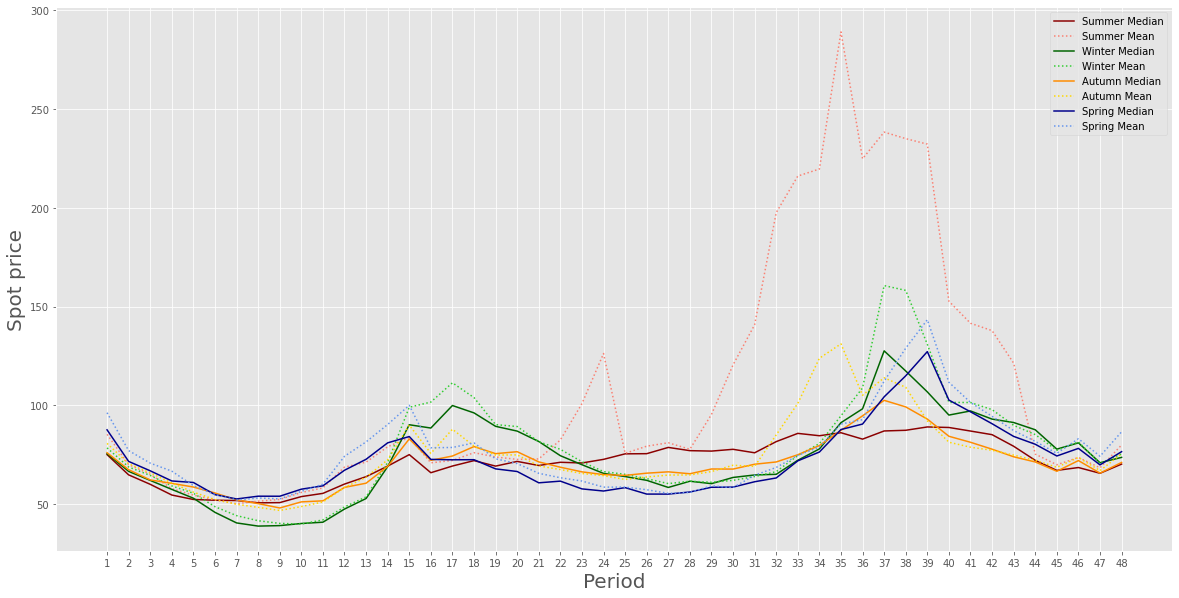

In [39]:
plt.figure(figsize=(20,10))
plt.plot(vic[vic.season == 'Summer'].groupby('period').spot_price.median(), label='Summer Median', c='darkred')
plt.plot(vic[vic.season == 'Summer'].groupby('period').spot_price.mean(), label='Summer Mean', c='salmon', linestyle='dotted')
plt.plot(vic[vic.season == 'Winter'].groupby('period').spot_price.median(), label='Winter Median', c='darkgreen')
plt.plot(vic[vic.season == 'Winter'].groupby('period').spot_price.mean(), label='Winter Mean', c='limegreen', linestyle='dotted')
plt.plot(vic[vic.season == 'Autumn'].groupby('period').spot_price.median(), label='Autumn Median', c='darkorange')
plt.plot(vic[vic.season == 'Autumn'].groupby('period').spot_price.mean(), label='Autumn Mean', c='gold', linestyle='dotted')
plt.plot(vic[vic.season == 'Spring'].groupby('period').spot_price.median(), label='Spring Median', c='darkblue')
plt.plot(vic[vic.season == 'Spring'].groupby('period').spot_price.mean(), label='Spring Mean', c='cornflowerblue', linestyle='dotted')

plt.xlabel('Period', fontsize=20)
plt.xticks(list(set(vic.period)))
plt.ylabel('Spot price', fontsize=20)
plt.legend()
plt.show()

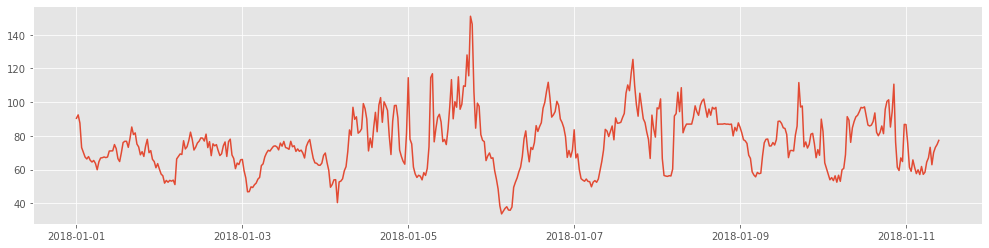

In [42]:
plt.figure(figsize=(17,4))
plt.plot(vic.spot_price[:500])